In [2]:
import torch
import torchvision.datasets as datasets
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import nn, optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\quock\anaconda3\envs\QuocKhanh\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from scipy.io import loadmat
data =loadmat(r"D:\LAB\Pytorch\ComputerVision\Gen\from_scratch\mnist-original.mat")
print(data.keys())
# Convert .mat to .csv file
import pandas as pd
x0 = data["data"]
y0 = data["label"]
x = x0.T
y = y0.T
print(x.shape)
print(y.shape)
data_csv = np.concatenate((x,y), axis=1)
print(data_csv.shape)
df =pd.DataFrame(data_csv)
df.to_csv(r"D:\LAB\Pytorch\ComputerVision\Gen\from_scratch\mnist-original.csv")

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
(70000, 784)
(70000, 1)
(70000, 785)


In [4]:
# data Mnist from pytorch
batch_size = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = datasets.MNIST(root= "/data/", train = True, transform= transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = dataset, batch_size = batch_size, shuffle = True)

100%|██████████| 9912422/9912422 [00:01<00:00, 7129603.29it/s] 


Extracting /data/MNIST\raw\train-images-idx3-ubyte.gz to /data/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 95817.69it/s]


Extracting /data/MNIST\raw\train-labels-idx1-ubyte.gz to /data/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3881899.60it/s]


Extracting /data/MNIST\raw\t10k-images-idx3-ubyte.gz to /data/MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4561908.23it/s]

Extracting /data/MNIST\raw\t10k-labels-idx1-ubyte.gz to /data/MNIST\raw



In [5]:
for i, (x, _) in tqdm(enumerate(train_loader)):
    x = x.to(device)
    x0 = x.view(x.shape[0], 784)

938it [00:05, 178.95it/s]


In [6]:
print(50176/64)

784.0


In [7]:
from scipy.io import loadmat
mnist = loadmat(r"D:\LAB\Pytorch\ComputerVision\Gen\from_scratch\mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


0 : 6903
1 : 7877
2 : 6990
3 : 7141
4 : 6824
5 : 6313
6 : 6876
7 : 7293
8 : 6825
9 : 6958
70000


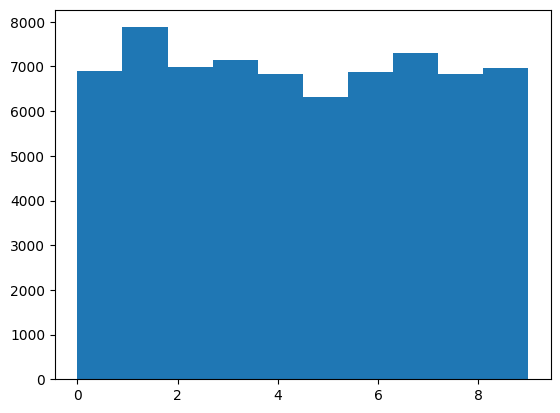

In [8]:
# Plot frequence of labels [0,9]:
def count_number(num):
    count = 0
    for i in range(len(mnist_label)):
        if mnist_label[i] == num:
            count += 1
    print(num, ':',count)
for i in range(10):
    count_number(i)
plt.hist(mnist_label, bins = 10)
print(6903+7877+6990+7141+6824+6313+6876+7293+6825+6958)

(array([[637.,  12.,   8.,  12.,   8.,   5.,   7.,   5.,  14.,  76.],
        [675.,  11.,   6.,  10.,  12.,   7.,  11.,   8.,   8.,  36.],
        [649.,  15.,   4.,  11.,   8.,  10.,   5.,   5.,  13.,  64.],
        [613.,  12.,   8.,  10.,   5.,   9.,  11.,  12.,  11.,  93.],
        [666.,   7.,  10.,  11.,   3.,   7.,   9.,   4.,  10.,  57.],
        [582.,  16.,  11.,   8.,  10.,   8.,  16.,  11.,   9., 113.],
        [625.,  12.,   7.,   4.,   5.,   8.,   7.,  14.,  12.,  90.],
        [651.,   0.,  18.,   0.,   0.,  14.,   0.,  20.,   0.,  81.],
        [630.,  11.,   8.,  11.,   6.,   6.,  12.,  15.,  10.,  75.],
        [632.,   0.,  25.,   0.,   0.,  31.,   0.,  22.,   0.,  74.],
        [606.,  12.,   6.,  11.,   6.,   9.,  14.,  11.,  11.,  98.],
        [654.,   0.,  12.,   0.,   0.,  15.,   0.,  18.,   0.,  85.],
        [639.,  12.,   8.,   8.,   9.,   8.,   7.,   7.,  11.,  75.],
        [726.,   0.,   7.,   2.,   3.,   1.,   3.,  11.,   1.,  30.],
        [713.,  10.,

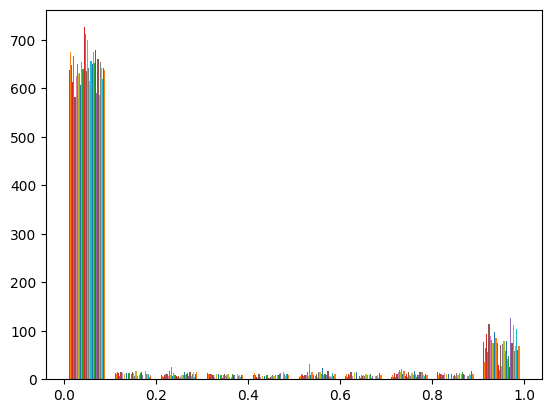

In [13]:
plt.hist(x0)

In [10]:
# print(x0[0].reshape(1,28,28))

torch.Size([784])


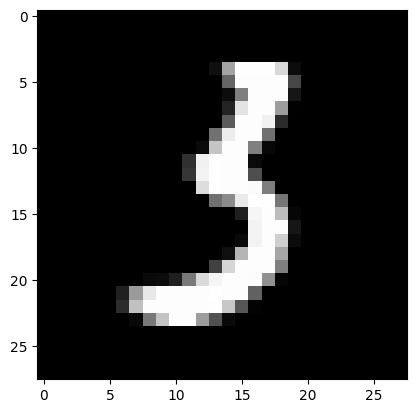

In [11]:
for i in range(10):
    plt.imshow(x0[i].reshape(28,28,1), cmap = 'gray')
# plt.plot(x0[0].reshape(28,28))
print(x0[0].shape)

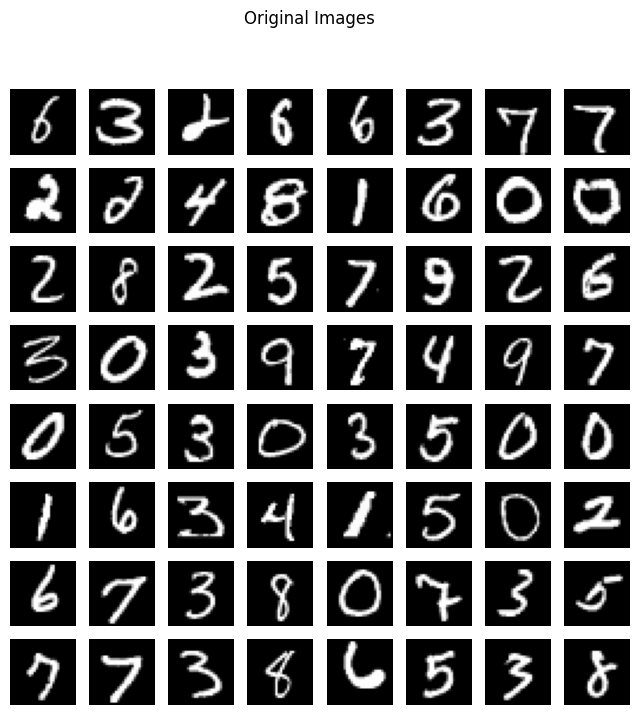

In [12]:
def plot_samples_grid(ds_loader, n_rows=8, n_cols=8, fig_size=8, img_dim=28, title=None):
      
    f, axarr = plt.subplots(n_rows, n_cols, figsize=(fig_size, fig_size))

    images, labels = next(iter(ds_loader))

    for i, ax in enumerate(axarr.flat):
        ax.imshow(images[i].view(img_dim, img_dim), cmap = 'gray')
        ax.axis('off')
        
    plt.suptitle(title)
    plt.show()

plot_samples_grid(train_loader, title='Original Images')